In [3]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import os
os.chdir(r'C:\Users\Kasper van Eck\Dropbox\Personal Stuff\Datasets')
os.getcwd()

data = pd.read_excel('MAP_ESS_EVENTS.xlsx')

data.head()
data.drop(data.columns[[7, 8]],axis =1, inplace = True)

pd.to_datetime('03/12/2019', format ='%d/%m/%Y')
pd.to_datetime('01-13-2019', format ='%m-%d-%Y')
pd.to_datetime('03-12-2019') # be careful with not indiciating the format, it will assume something


Timestamp('2019-03-12 00:00:00')

In [2]:
#data_test = pd.read_clipboard()

data.shape

(1163, 7)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1163 entries, 0 to 1162
Data columns (total 7 columns):
EVENT CODE          1163 non-null object
EVENT DESCR         1163 non-null object
EVENT TYPE CODE     1163 non-null object
EVENT TYPE DESCR    1163 non-null object
STORE NO            1163 non-null object
FROM DATE           1163 non-null datetime64[ns]
TO DATE             1163 non-null datetime64[ns]
dtypes: datetime64[ns](2), object(5)
memory usage: 63.7+ KB


In [3]:
data.head()

,EVENT CODE,EVENT DESCR,EVENT TYPE CODE,EVENT TYPE DESCR,STORE NO,FROM DATE,TO DATE
0,FLASH,Flash promo evening,COLL,Collection event,AMST1,2016-10-22,2016-10-22
1,FLASH,Flash promo evening,COLL,Collection event,AMST1,2017-04-22,2017-04-22
2,FLASH,Flash promo evening,COLL,Collection event,AMST1,2017-10-28,2017-10-28
3,FLASH,Flash promo evening,COLL,Collection event,AMST1,2018-04-21,2018-04-21
4,FLASH,Flash promo evening,COLL,Collection event,AMST1,2018-10-13,2018-10-13


In [20]:
data.describe()

,EVENT CODE,EVENT DESCR,EVENT TYPE CODE,EVENT TYPE DESCR,STORE NO,FROM DATE,TO DATE
count,1163,1163,1163,1163,1163,1163,1163
unique,6,6,4,2,70,104,94
top,FLASH,Flash promo evening,DISC,Discount Event,HASS1,2019-11-29 00:00:00,2019-07-31 00:00:00
freq,337,337,781,781,28,61,63
first,NaN,NaN,NaN,NaN,NaN,2014-11-01 00:00:00,2014-11-01 00:00:00
last,NaN,NaN,NaN,NaN,NaN,2019-11-29 00:00:00,2019-12-01 00:00:00


In [6]:
for column in data.select_dtypes(include = 'object').columns:
    uniques = data[column].unique()
    print('{0:20s} {1:5d}\t'.format(column, len(uniques)), uniques[:5])

EVENT CODE               6	 ['FLASH' 'BLACK' 'W-MIXANDMATCH' 'W-PRESALES' 'W-SALES']
EVENT DESCR              6	 ['Flash promo evening' 'Black Friday' 'Mix&Match' 'PRE-SALES' 'SALES']
EVENT TYPE CODE          4	 ['COLL        ' 'COLL' 'COLL    ' 'DISC']
EVENT TYPE DESCR         2	 ['Collection event' 'Discount Event']
STORE NO                70	 ['AMST1' 'AMST1     ' 'AMST1                  ' 'AMST1 ' 'AMST2']


In [7]:
# Remove leading and trailing spaces, then replace in between ones with _
data.columns = data.columns.str.strip().str.replace(' ', '_').str.lower()
data.head(1)

,event_code,event_descr,event_type_code,event_type_descr,store_no,from_date,to_date
0,FLASH,Flash promo evening,COLL,Collection event,AMST1,2016-10-22,2016-10-22


In [8]:
# Stripping all leading and trailing spaces & setting everything to lower
for i in data.select_dtypes(include = 'object'):
   data[i] = data[i].str.lower().str.strip()
data.head() 

# Alternative
#data_lower = data.select_dtypes(include = 'object').apply(lambda x: x.str.lower().str.strip())
#data_lower = pd.concat([data_lower, data[['from_date', 'to_date']]], axis = 1)
#data_lower.head()

,event_code,event_descr,event_type_code,event_type_descr,store_no,from_date,to_date
0,flash,flash promo evening,coll,collection event,amst1,2016-10-22,2016-10-22
1,flash,flash promo evening,coll,collection event,amst1,2017-04-22,2017-04-22
2,flash,flash promo evening,coll,collection event,amst1,2017-10-28,2017-10-28
3,flash,flash promo evening,coll,collection event,amst1,2018-04-21,2018-04-21
4,flash,flash promo evening,coll,collection event,amst1,2018-10-13,2018-10-13


In [9]:
data.select_dtypes(include = 'object').nunique()

event_code           6
event_descr          6
event_type_code      2
event_type_descr     2
store_no            67
dtype: int64

In [71]:
data['year'] = data.from_date.dt.strftime('%Y').astype('int16')
data_minyear = data.groupby(['event_code', 'year'])['from_date', 'to_date'].min()

data.select_dtypes(include = np.number).describe()

,year
count,1163.000000
mean,2017.784179
std,1.174466
min,2014.000000
25%,2017.000000
50%,2018.000000
75%,2019.000000
max,2019.000000


In [33]:
# Number of rows with Black Friday event, for 2019
len(data.loc[(data.event_code == 'black') & (data.year == '2019')])

61

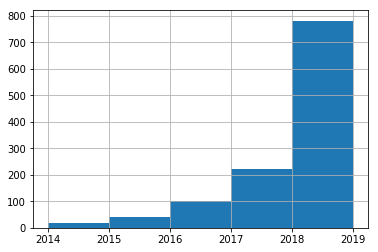

In [51]:
#%matplotlib.inline
data.year.hist(bins=5)

In [34]:
data['event_code'].map(len)
data['year'] = data.year.astype('int16')
data['years_altered'] = data['year'].map(lambda x: x*2+5)
data.head()

,event_code,event_descr,event_type_code,event_type_descr,store_no,from_date,to_date,year,years_altered
0,flash,flash promo evening,coll,collection event,amst1,2016-10-22,2016-10-22,2016,4037
1,flash,flash promo evening,coll,collection event,amst1,2017-04-22,2017-04-22,2017,4039
2,flash,flash promo evening,coll,collection event,amst1,2017-10-28,2017-10-28,2017,4039
3,flash,flash promo evening,coll,collection event,amst1,2018-04-21,2018-04-21,2018,4041
4,flash,flash promo evening,coll,collection event,amst1,2018-10-13,2018-10-13,2018,4041


,year,years_altered
year,1.0,1.0
years_altered,1.0,1.0


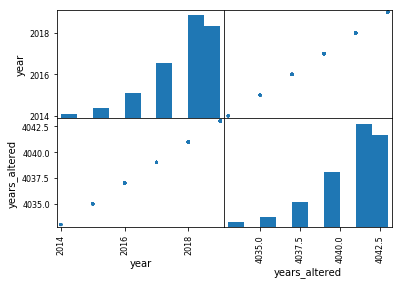

In [13]:
pd.plotting.scatter_matrix(data)
data.corr()

# Useful functions (descriptives for the dataset)

In [93]:
data.describe()
data.info()
data.shape
data.head()
data.columns
data.event_code.value_counts(dropna = False)

# Group by event_code + store_no and get the unique number of years 
# (e.g., for event = black, store = amst2, nunique = 4 (= 4 black friday events for amst2))
data.groupby(['event_code', 'store_no']).year.nunique()
data.groupby(['event_code', 'store_no']).year.nunique().max()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 1162 entries, 0 to 1162
Data columns (total 14 columns):
event_code          1162 non-null object
event_descr         1162 non-null object
event_type_code     1162 non-null object
event_type_descr    1162 non-null object
store_no            1162 non-null object
from_date           1162 non-null datetime64[ns]
to_date             1162 non-null datetime64[ns]
year                1151 non-null float64
years_altered       1162 non-null float64
new_column1         0 non-null float64
new_column2         0 non-null float64
new_column3         0 non-null float64
new_column4         0 non-null float64
duplicate_rows      1162 non-null bool
dtypes: bool(1), datetime64[ns](2), float64(6), object(5)
memory usage: 128.2+ KB


6

### Duplicates

In [94]:
# number of duplicate rows in dataset
data.duplicated().sum()

data.index.duplicated()

data.duplicated(['event_code']).sum() # duplicate rows for subset 'event_code'
data['duplicate_rows'] = data.duplicated(subset = ['event_code', 'store_no'], keep = False)
data.head()

# Drop duplicate rows
data.drop_duplicates() # subset = [] (default all columns), keep = False, First, Last

data.drop_duplicates(subset = ['event_code', 'store_no'], keep = False)

array([False, False, False, ..., False, False, False])

### Missing Data

In [118]:
data.loc[1,:] = np.nan
data.loc[5:15,'year'] = np.nan
data.isna().sum()

data.fillna(999)

# fills numeric columns with the mean
#data2 = data.fillna(data.mean()) 

# fills numeric columns with the mean grouped by store, event_code and then resets the index
data2 = data.groupby(['store_no']).apply(lambda x: x.fillna(x.mean()))
data2 = data2.reset_index(drop = True)
data2.head()


#CAUTION: if you want to use this for Machine Learning / Data Science: from a Data Science perspective it is wrong 
# to first replace NA and then split into train and test... You MUST first split into train and test, then replace NA 
# by mean on train and then apply this stateful preprocessing model to test, see the answer involving sklearn below! 
data.fillna(method = 'ffill') #bfill
data.head()

data2 = data2.reset_index(drop ='event_code')
data2.head(20)




,event_code,event_descr,event_type_code,event_type_descr,store_no,from_date,to_date,year,years_altered,new_column1,new_column2,new_column3,new_column4,duplicate_rows
0,black,black friday,disc,discount event,amst1,2017-11-24,2017-11-25,2019.0,4039.0,NaN,NaN,NaN,NaN,True
1,black,black friday,disc,discount event,amst1,2018-11-23,2018-11-25,2019.0,4041.0,NaN,NaN,NaN,NaN,True
2,black,black friday,disc,discount event,amst1,2016-11-25,2016-11-26,2019.0,4037.0,NaN,NaN,NaN,NaN,True
3,black,black friday,disc,discount event,amst1,2019-11-29,2019-12-01,2019.0,4043.0,NaN,NaN,NaN,NaN,True
4,cruise,cruise event,coll,collection event,amst1,2019-11-09,2019-11-09,2019.0,4043.0,NaN,NaN,NaN,NaN,False


In [42]:
# Counting the number of NaNs in year grouped by event code
# Subset the NaNs in column 'year' and count the va
data[data.year.isna()]['event_code'].value_counts(dropna = False)
# data[data.year.isna()].groupby('event_code')['event_code'].count() # same result

event_code
black            3
flash            3
w-mixandmatch    1
w-presales       1
w-sales          3
Name: event_code, dtype: int64

# Subsetting & adding columns to dataset

In [78]:
data[data.event_code == 'flash'] # data.loc[data.event_code == 'flash',:]

data.loc[(data.event_code == 'flash') | (data.event_code == 'black'),:] # flash or black
data.loc[data.event_code.isin(['flash', 'black']),:] # flash or black

data.loc[~data.event_code.isin(['flash', 'black']) & (data.store_no == 'amst1'),:] # not flash or black, store = amst1

# First drop all rows where event_code is NAN, then subset all event_codes containing 'sale'
data=data.drop(data.loc[data.event_code.isna()].index, axis = 0).copy()
data.loc[data2.event_code.str.contains('sale'),:].head()

1162

### Subsetting via index

In [ ]:
i1 = data.loc[data['event_code' == 'flash'] & 
                                   data.event_code.isna(), :].index
data = data.drop(i1)

## Adding columns to dataset (to fill with data later)

In [84]:
Additional_columns = {'new_column1': [np.nan]*len(data.index),
                      'new_column2': [np.nan]*len(data.index),
                      'new_column3': [np.nan]*len(data.index),
                      'new_column4': [np.nan]*len(data.index)}
data = data.assign(**Additional_columns)

data.assign(BF_2018 = lambda x: (x.year == 2018) & (x.event_code == 'black'))


,event_code,event_descr,event_type_code,event_type_descr,store_no,from_date,to_date,year,years_altered,new_column1,new_column2,new_column3,new_column4,BF_2018
0,flash,flash promo evening,coll,collection event,amst1,2016-10-22,2016-10-22,2016.0,4037.0,NaN,NaN,NaN,NaN,False
2,flash,flash promo evening,coll,collection event,amst1,2017-10-28,2017-10-28,2017.0,4039.0,NaN,NaN,NaN,NaN,False
3,flash,flash promo evening,coll,collection event,amst1,2018-04-21,2018-04-21,2018.0,4041.0,NaN,NaN,NaN,NaN,False
4,flash,flash promo evening,coll,collection event,amst1,2018-10-13,2018-10-13,2018.0,4041.0,NaN,NaN,NaN,NaN,False
5,black,black friday,disc,discount event,amst1,2017-11-24,2017-11-25,NaN,4039.0,NaN,NaN,NaN,NaN,False
6,black,black friday,disc,discount event,amst1,2018-11-23,2018-11-25,NaN,4041.0,NaN,NaN,NaN,NaN,False
7,black,black friday,disc,discount event,amst1,2016-11-25,2016-11-26,NaN,4037.0,NaN,NaN,NaN,NaN,False
8,w-mixandmatch,mix&match,disc,discount event,amst1,2017-12-08,2017-12-18,NaN,4039.0,NaN,NaN,NaN,NaN,False
9,w-presales,pre-sales,disc,discount event,amst1,2017-12-19,2017-12-26,NaN,4039.0,NaN,NaN,NaN,NaN,False
10,w-sales,sales,disc,discount event,amst1,2017-12-27,2018-02-02,NaN,4039.0,NaN,NaN,NaN,NaN,False


# Outliers detection

In [103]:
from scipy import stats
data['year_dupl'] = data['year']
df_numeric = data.select_dtypes(include = np.number)
outliers = df_numeric[(np.abs(stats.zscore(df_numeric)) > 3).all(axis=1)]

print(outliers)

     year  year_dupl
28   2014       2014
78   2014       2014
112  2014       2014
134  2014       2014
156  2014       2014
178  2014       2014
224  2014       2014
246  2014       2014
317  2014       2014
360  2014       2014
382  2014       2014
404  2014       2014
581  2014       2014
603  2014       2014
625  2014       2014
646  2014       2014
692  2014       2014
752  2014       2014
873  2014       2014


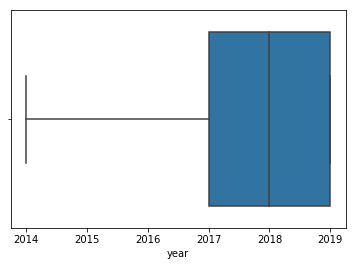

In [105]:
import seaborn as sns
sns.boxplot(data['year'])

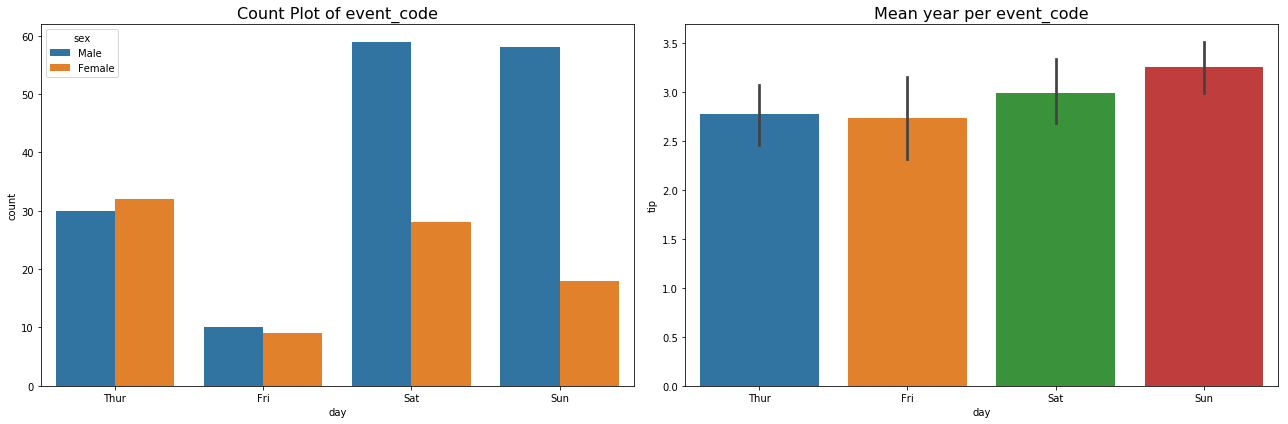

In [129]:
# Visualization of different user types
grouped = tips.groupby('day')['tip'].mean().reset_index()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

sns.countplot(x='day', hue='sex', data=tips, ax=ax[0])
ax[0].set_title('Count Plot of event_code', fontsize=16)
#ax[0].set_yscale('log')

sns.barplot(x='day', y='tip', data=tips, ax=ax[1]);
ax[1].set_title('Mean year per event_code', fontsize=16)
plt.tight_layout()
plt.show()

In [139]:
tips.groupby('day')['tip'].agg(['min', 'max', 'mean', 'std', np.min, np.max])

,min,max,mean,std,amin,amax
day,,,,,,
Thur,1.25,6.70,2.771452,1.240223,1.25,6.70
Fri,1.00,4.73,2.734737,1.019577,1.00,4.73
Sat,1.00,10.00,2.993103,1.631014,1.00,10.00
Sun,1.01,6.50,3.255132,1.234880,1.01,6.50


In [120]:
tips = sns.load_dataset("tips")  
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [134]:
%qtconsole